# 1. Handling Missing Data

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

### Create DataFrame

In [2]:
missing_data_df = pd.DataFrame(
    {
        "Students": ["Tom", "Peter",np.nan, "Mary", "Tom","King","Tom","Mary",np.nan],
        "Exam_Date": ["15/01/2021", "16/01/2021", "19/01/2021", "27/01/2021", "16/01/2021",
                      "16/01/2021", "16/01/2021", "16/01/2021", "16/01/2021"],
        "Math": [79.00, 67.00,np.nan, np.nan, 70.00,np.nan,90.00,76.00,np.nan],
        "Physics":[63.00, np.nan, 60.00, np.nan,84.00, 77.00,55.00,np.nan,66.00],
        "Computer":[np.nan,78.00, 57.00, 88.00, np.nan,np.nan,np.nan,70.00,np.nan],
    }
)

missing_data_df

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Show null values and return false if not null

In [3]:
missing_data_df.isnull().head()

,Students,Exam_Date,Math,Physics,Computer
0,False,False,False,False,True
1,False,False,False,True,False
2,True,False,True,False,False
3,False,False,True,True,False
4,False,False,False,False,True


###### Show count of null values

In [4]:
missing_data_df.isnull().sum()

Students     2
Exam_Date    0
Math         4
Physics      3
Computer     5
dtype: int64

###### Show not null values and return true if not null

In [5]:
missing_data_df.notnull().head()

,Students,Exam_Date,Math,Physics,Computer
0,True,True,True,True,False
1,True,True,True,False,True
2,False,True,False,True,True
3,True,True,False,False,True
4,True,True,True,True,False


### 1.  Deleting records with missing values
###### Drop entire row with all values null

In [6]:
missing_data_df.dropna(how='all')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Drop column with any null value

In [7]:
missing_data_df.dropna(how='any',axis=1)

,Exam_Date
0,15/01/2021
1,16/01/2021
2,19/01/2021
3,27/01/2021
4,16/01/2021
5,16/01/2021
6,16/01/2021
7,16/01/2021
8,16/01/2021


###### Drop rows with any of specified columns have null

In [8]:
missing_data_df.dropna(subset=['Math', 'Physics'], how='any')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
4,Tom,16/01/2021,70.0,84.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN


###### Drop rows with all of specified columns have null

In [9]:
missing_data_df.dropna(subset=['Math', 'Physics'], how='all')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Drop row with a given number of null values

In [10]:
missing_data_df.dropna(axis=1,thresh=2)

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


### 2. Imputation
###### Replace null values with a scalar value

In [11]:
missing_data_df.fillna(-999) # replace null values with -999

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,-999.0
1,Peter,16/01/2021,67.0,-999.0,78.0
2,-999,19/01/2021,-999.0,60.0,57.0
3,Mary,27/01/2021,-999.0,-999.0,88.0
4,Tom,16/01/2021,70.0,84.0,-999.0
5,King,16/01/2021,-999.0,77.0,-999.0
6,Tom,16/01/2021,90.0,55.0,-999.0
7,Mary,16/01/2021,76.0,-999.0,70.0
8,-999,16/01/2021,-999.0,66.0,-999.0


###### Backward Fill

In [12]:
missing_data_df.fillna(method='bfill') 

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,78.0
1,Peter,16/01/2021,67.0,60.0,78.0
2,Mary,19/01/2021,70.0,60.0,57.0
3,Mary,27/01/2021,70.0,84.0,88.0
4,Tom,16/01/2021,70.0,84.0,70.0
5,King,16/01/2021,90.0,77.0,70.0
6,Tom,16/01/2021,90.0,55.0,70.0
7,Mary,16/01/2021,76.0,66.0,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Forward Fill

In [13]:
missing_data_df.fillna(method='ffill')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,63.0,78.0
2,Peter,19/01/2021,67.0,60.0,57.0
3,Mary,27/01/2021,67.0,60.0,88.0
4,Tom,16/01/2021,70.0,84.0,88.0
5,King,16/01/2021,70.0,77.0,88.0
6,Tom,16/01/2021,90.0,55.0,88.0
7,Mary,16/01/2021,76.0,55.0,70.0
8,Mary,16/01/2021,76.0,66.0,70.0


###### Impute null value with statistical measures

In [14]:
missing_data_df.fillna(missing_data_df.Math.mean()) # fillna null value in Math column with mean of the Math
missing_data_df.fillna(missing_data_df.Students.mode()) # fillna null value in Students column with mode of the Students
missing_data_df.fillna(missing_data_df.Computer.median()) # fillna null value in Computer column with median of the Computer

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,74.0
1,Peter,16/01/2021,67.0,74.0,78.0
2,74,19/01/2021,74.0,60.0,57.0
3,Mary,27/01/2021,74.0,74.0,88.0
4,Tom,16/01/2021,70.0,84.0,74.0
5,King,16/01/2021,74.0,77.0,74.0
6,Tom,16/01/2021,90.0,55.0,74.0
7,Mary,16/01/2021,76.0,74.0,70.0
8,74,16/01/2021,74.0,66.0,74.0


### 3. Interpolate missing values
###### Interpolate missing data in forward direction

In [15]:
missing_data_df.interpolate(method='linear', limit_direction ='forward')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,61.5,78.0
2,NaN,19/01/2021,68.0,60.0,57.0
3,Mary,27/01/2021,69.0,72.0,88.0
4,Tom,16/01/2021,70.0,84.0,83.5
5,King,16/01/2021,80.0,77.0,79.0
6,Tom,16/01/2021,90.0,55.0,74.5
7,Mary,16/01/2021,76.0,60.5,70.0
8,NaN,16/01/2021,76.0,66.0,70.0


###### Interpolate missing data in backward direction

In [16]:
missing_data_df.interpolate(method='linear', limit_direction ='backward')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,78.0
1,Peter,16/01/2021,67.0,61.5,78.0
2,NaN,19/01/2021,68.0,60.0,57.0
3,Mary,27/01/2021,69.0,72.0,88.0
4,Tom,16/01/2021,70.0,84.0,83.5
5,King,16/01/2021,80.0,77.0,79.0
6,Tom,16/01/2021,90.0,55.0,74.5
7,Mary,16/01/2021,76.0,60.5,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


### 4. Model-based techniques
###### Nearest neighbors imputation

In [17]:
from sklearn.impute import KNNImputer

In [18]:
missing_data_df

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


In [19]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data=imputer.fit_transform(missing_data_df[['Math','Physics','Computer']].to_numpy())
imputed_data

array([[79. , 63. , 63.5],
       [67. , 73.5, 78. ],
       [84.5, 60. , 57. ],
       [71.5, 61.5, 88. ],
       [70. , 84. , 74. ],
       [74.5, 77. , 67.5],
       [90. , 55. , 63.5],
       [76. , 73.5, 70. ],
       [84.5, 66. , 67.5]])

In [20]:
pd.concat([missing_data_df[['Students','Exam_Date']],pd.DataFrame(imputed_data,columns=['Math','Physics','Computer'])],axis=1)

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,63.5
1,Peter,16/01/2021,67.0,73.5,78.0
2,NaN,19/01/2021,84.5,60.0,57.0
3,Mary,27/01/2021,71.5,61.5,88.0
4,Tom,16/01/2021,70.0,84.0,74.0
5,King,16/01/2021,74.5,77.0,67.5
6,Tom,16/01/2021,90.0,55.0,63.5
7,Mary,16/01/2021,76.0,73.5,70.0
8,NaN,16/01/2021,84.5,66.0,67.5


# 2. Handling Imbalanced Data

### Load Data

In [21]:
import matplotlib.pyplot as plt

titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Check for Class Imbalance in Data

<AxesSubplot:>

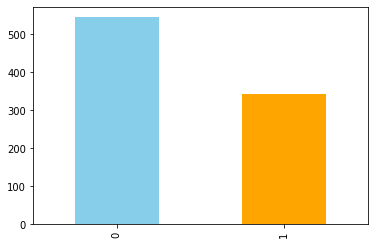

In [22]:
titanic_df['Survived'].value_counts().plot(kind='bar',color=['skyblue','orange'])

## 1. K-Fold Cross-Validation
Sklearn has KFold(n_splits=5, *, shuffle=False, random_state=None) class that splits the dataset into k consecutive folds (without shuffling by default). the n_splits sets the number of folds. 
### Let's fit a regression model on titanic data with KFold cross validation

In [23]:
# import required libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
#Get features and target variables from data
X=titanic_df[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y=titanic_df['Survived']
# prepare cross-validation data with 10 folds
cv=KFold(n_splits=10, shuffle=True, random_state=1)
# model
model=LogisticRegression()
#Evaluate model with cv
score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
print('Min Accuracy %.2f'% (score.min()*100),'%')
print('Max Accuracy %.2f'% (score.max()*100),'%')
print('Mean Accuracy %.2f'% (np.mean(score)*100),'%')

Min Accuracy 62.92 %
Max Accuracy 77.27 %
Mean Accuracy 69.57 %


### Let's determine the value of k (folds) with higher acuracy

In [24]:
def model_evaluation(cv,X,y):
    model=LogisticRegression()
    score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
    return score.min(), score.max(),np.mean(score)
    
folds=range(2,21)
min_cv,max_cv,mean_cv=list(),list(),list()
#iterate through each value of fold/k
for k in folds:
    cv=KFold(n_splits=k,shuffle=True,random_state=1)
    k_min,k_max,k_mean=model_evaluation(cv,X,y)
    min_cv.append(k_min*100),max_cv.append(k_max*100),mean_cv.append(k_mean*100)
    print('Folds=%d || Min Acc. %.2f || Max Acc. %.2f || Mean Acc.%.2f' % (k,k_min,k_max,k_mean))

Folds=2 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.69
Folds=3 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.70
Folds=4 || Min Acc. 0.66 || Max Acc. 0.71 || Mean Acc.0.70
Folds=5 || Min Acc. 0.66 || Max Acc. 0.72 || Mean Acc.0.69
Folds=6 || Min Acc. 0.67 || Max Acc. 0.73 || Mean Acc.0.70
Folds=7 || Min Acc. 0.65 || Max Acc. 0.73 || Mean Acc.0.69
Folds=8 || Min Acc. 0.63 || Max Acc. 0.75 || Mean Acc.0.69
Folds=9 || Min Acc. 0.65 || Max Acc. 0.74 || Mean Acc.0.69
Folds=10 || Min Acc. 0.63 || Max Acc. 0.77 || Mean Acc.0.70
Folds=11 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=12 || Min Acc. 0.64 || Max Acc. 0.77 || Mean Acc.0.70
Folds=13 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=14 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.70
Folds=15 || Min Acc. 0.64 || Max Acc. 0.75 || Mean Acc.0.70
Folds=16 || Min Acc. 0.62 || Max Acc. 0.82 || Mean Acc.0.70
Folds=17 || Min Acc. 0.62 || Max Acc. 0.83 || Mean Acc.0.70
Folds=18 || Min Acc. 0.62 || Max Acc. 0.84 || Me

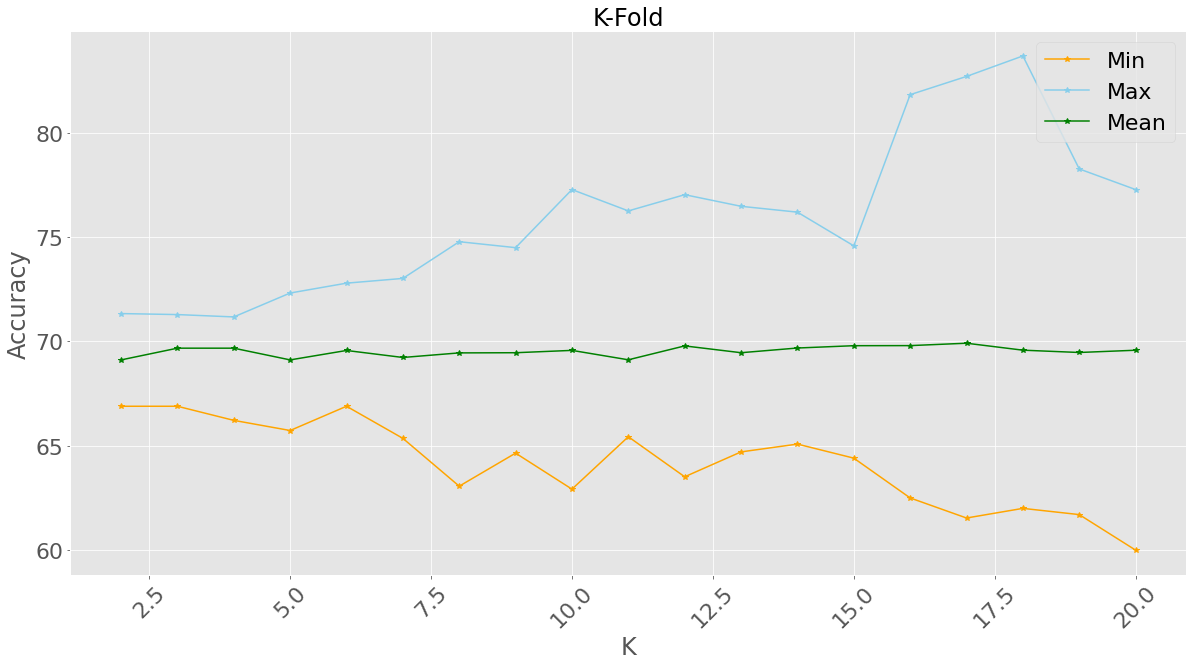

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Other sytles to use; fivethirtyeight

plt.figure(figsize=(20,10)) # Set figure size
plt.rcParams.update({'font.size': 22}) # Set axes size
plt.plot(folds,min_cv,color='orange',marker='*') # Plot the minimum accuracy
plt.plot(folds,max_cv,color='skyblue',marker='*') # Plot the maximum accuracy
plt.plot(folds,mean_cv,color='green',marker='*') # Plot the mean accuracy
plt.title('K-Fold',fontsize=24)
plt.xticks(rotation=45)
plt.xlabel('K',fontsize=24)
plt.ylabel('Accuracy',fontsize=24)
plt.legend(['Min','Max','Mean'], loc='upper right')
plt.show()

## 2. Oversampling

#### i. Simple random oversampling
We will use imbalanced-learn which is a python package for data re-sampling. To install imbalanced-learn open terminal and run

pip install imbalanced-learn

When using Anaconda run the below command on Anaconda prompt terminal 

conda install -c conda-forge imbalanced-learn

<AxesSubplot:>

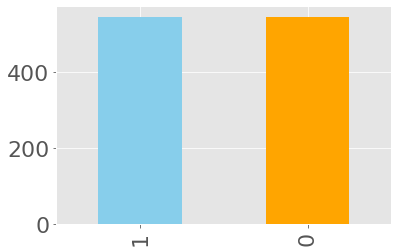

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
X_resapmled,y_resampled=ros.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### ii. Oversampling by shrinkage
We use imbalanced-learn library which comes with RandomOverSampler classs but in this case we add shrinkage parameter

<AxesSubplot:>

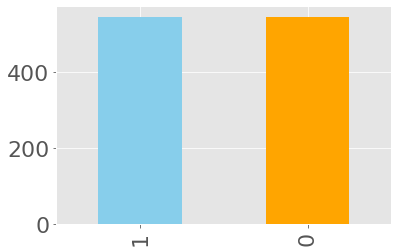

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(shrinkage=0.15)
X_resapmled,y_resampled=ros.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### iii. Oversampling with SMOTE
The imbalanced-learn package comes with SMOTE class for synthetic sampling

<AxesSubplot:>

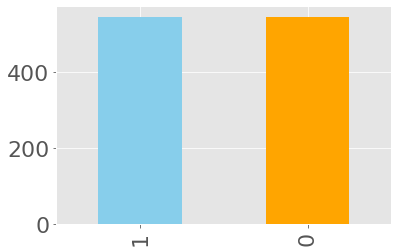

In [28]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

## 3. Undersampling

#### i. Simple random undersampling
We use imbalanced-learn which comes with RandomUnderSampler class for undersampling data

<AxesSubplot:>

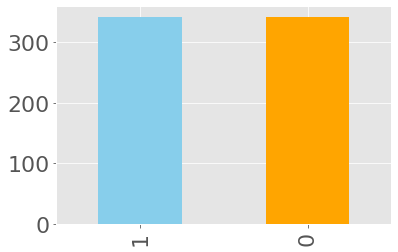

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
X_resampled,y_resampled=rus.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### ii. Undersampling with K-Means
The imbalanced-learn library contains the ClusterCentroids class for creating clusters for undersampling

<AxesSubplot:>

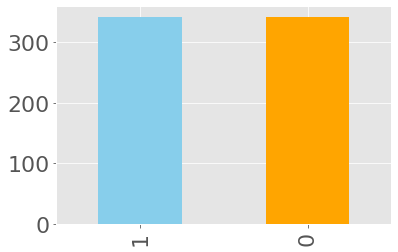

In [30]:
from imblearn.under_sampling import ClusterCentroids

cc=ClusterCentroids()
X_resampled,y_resampled=cc.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### iii. Undersampling using Tomek links
The imbalanced-learn library comes with TomekLinks class which we use for undersampling. 

Note that the resultant samples for each class are not the same. This is because Tomek Links only removes the samples from majority class that are close to minority class.

<AxesSubplot:>

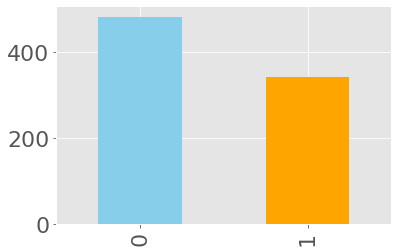

In [31]:
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
X_resampled,y_resampled=tl.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

## 4. Oversampling and Undersampling
To get a robust way to deal with imbalanced data we can combine both oversampling and undersampling techniques. The imbalanced-learn library comes with a SMOTETomek class which is used for oversampling and undersampling.

<AxesSubplot:>

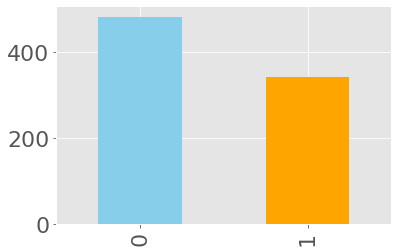

In [32]:
from imblearn.combine import SMOTETomek

st=SMOTETomek()
X_resampled,y_Resampled=st.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

# 3. Outliers in Data

### Load data

In [33]:
continental_temperature_df=pd.read_csv('continental_temperature.csv')
continental_temperature_df.head()

,Region,Year,AvgTemperature
0,Africa,1995,0.976737
1,Africa,1996,48.348380
2,Africa,1997,37.282495
3,Africa,1998,30.327075
4,Africa,1999,14.153869


#### 1. Z-score for outlier detection
Note that we filte routliers based on Z-Score value of >2 or <2

In [34]:
from scipy import stats

z_score_temperature=stats.zscore(continental_temperature_df['AvgTemperature'])
continental_temperature_df['Z-Score']=z_score_temperature # create new column for z-score
continental_temperature_df[(continental_temperature_df['Z-Score']<-2) | (continental_temperature_df['Z-Score']>2)] # filter samples Z-score value <-2 and >2

,Region,Year,AvgTemperature,Z-Score
0,Africa,1995,0.976737,-2.842742
4,Africa,1999,14.153869,-2.209245
37,Asia,2006,162.959178,4.944641
44,Asia,2013,167.478655,5.161917
86,Europe,2003,13.504275,-2.240474
121,Middle East,2012,200.381547,6.743740
155,North America,2020,17.406831,-2.052857
174,South/Central America & Carribean,2013,113.894057,2.585812
178,South/Central America & Carribean,2017,129.952968,3.357852


#### 2. Interquatile Range

###### i. Interquartile Range using scipy iqr

In [35]:
iqr=stats.iqr(continental_temperature_df['AvgTemperature'],interpolation='midpoint')
iqr

14.318334585000002

###### ii. Interquartile Range using percentile function

In [36]:
Q1=np.percentile(continental_temperature_df['AvgTemperature'], 25, interpolation='midpoint')
Q3=np.percentile(continental_temperature_df['AvgTemperature'], 75, interpolation='midpoint')

iqr=Q3-Q1
print("Q1 : ",Q1,"\nQ3 : ",Q3,"\nIQR : ",iqr)

Q1 :  52.85268644 
Q3 :  67.171021025 
IQR :  14.318334585000002


#### 3. Boxplot

C:\Users\soongaya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


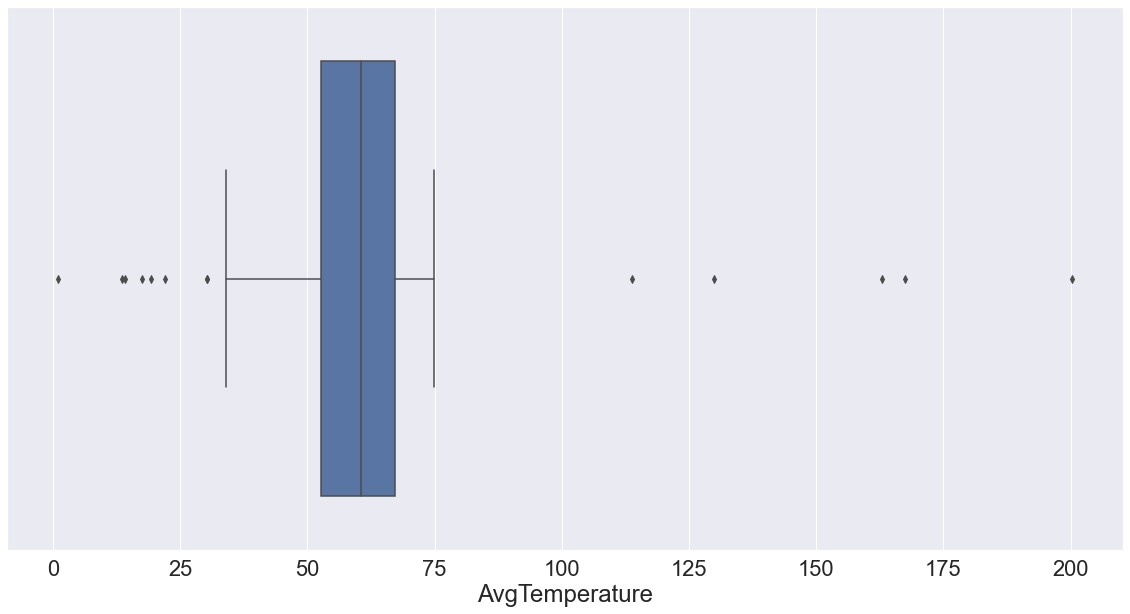

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)}) # Set figure size 

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.boxplot(continental_temperature_df['AvgTemperature'])
plt.show()

#### 4. Scatter plot

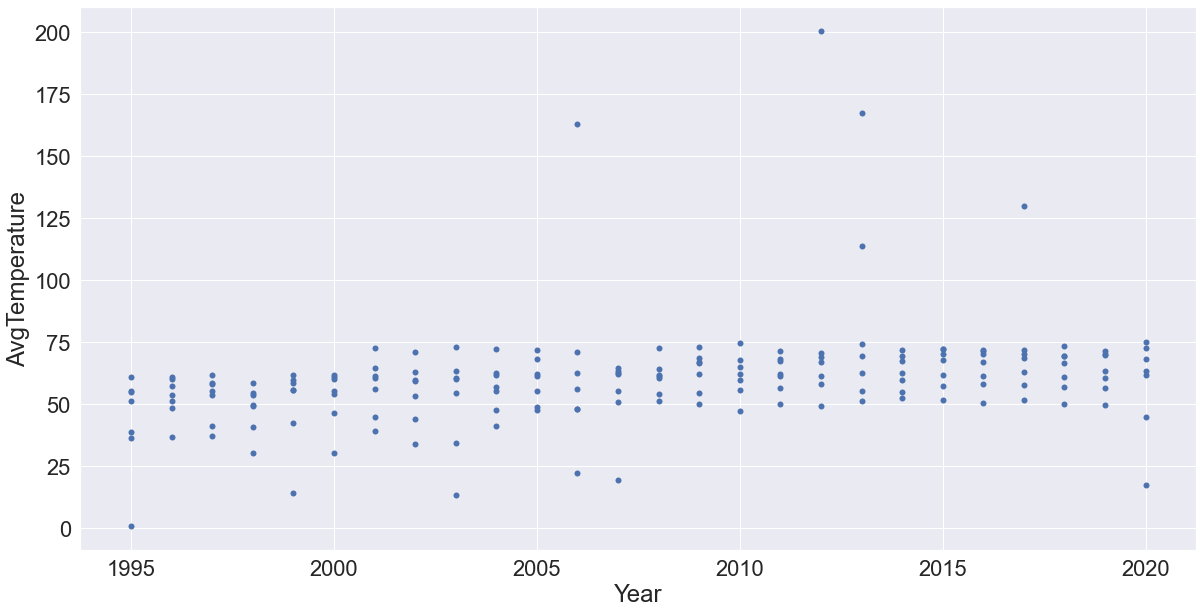

In [38]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="Year", y="AvgTemperature", sizes=(1, 8), linewidth=0,data=continental_temperature_df)
plt.show()

#### 5. Histogram
Histogram with Kernel Density Estimation 

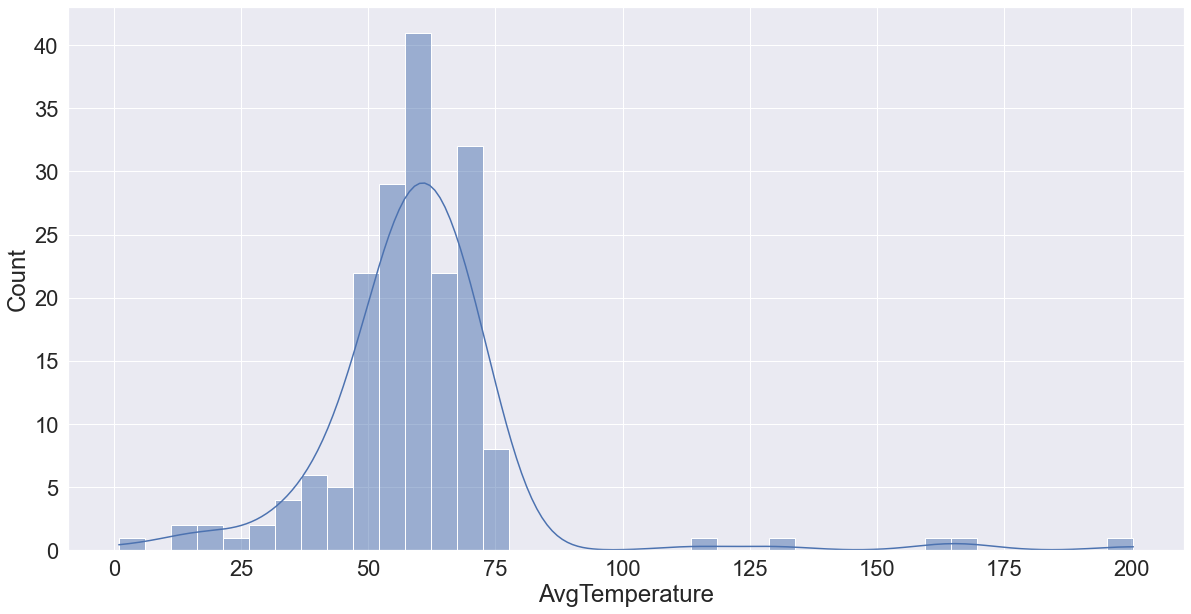

In [39]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.histplot(continental_temperature_df, x='AvgTemperature',kde=True)
plt.show()

#### 6. DBSCAN for Outlier Detection
The output of 1- implies that the data point is an outlier

In [40]:
from sklearn.cluster import DBSCAN

data=continental_temperature_df['AvgTemperature'].to_numpy().reshape(-1, 1)
dbscan=DBSCAN(min_samples=2, eps=3)
clusters=dbscan.fit_predict(data)
continental_temperature_df['dbscan_outliers']=clusters
continental_temperature_df[continental_temperature_df['dbscan_outliers']<0] # Show outlier data poins

,Region,Year,AvgTemperature,Z-Score,dbscan_outliers
0,Africa,1995,0.976737,-2.842742,-1
37,Asia,2006,162.959178,4.944641,-1
44,Asia,2013,167.478655,5.161917,-1
121,Middle East,2012,200.381547,6.743740,-1
174,South/Central America & Carribean,2013,113.894057,2.585812,-1
178,South/Central America & Carribean,2017,129.952968,3.357852,-1


#### 7. Isolation Forest
The sklearn.ensemble class has a function called IsolationForest that returns the anomaly score of each sample using the IsolationForest algorithm.The contamination parameter determines the he amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples. The output of 1- implies that the data point is an outlier

In [41]:
from sklearn.ensemble import IsolationForest

data=continental_temperature_df['AvgTemperature'].to_numpy().reshape(-1, 1)
isf=IsolationForest()
model=isf.fit_predict(data)

continental_temperature_df['isolation_forest_outliers']=model
continental_temperature_df[continental_temperature_df['isolation_forest_outliers']==-1] # Show outlier data poins

,Region,Year,AvgTemperature,Z-Score,dbscan_outliers,isolation_forest_outliers
0,Africa,1995,0.976737,-2.842742,-1,-1
2,Africa,1997,37.282495,-1.097325,0,-1
3,Africa,1998,30.327075,-1.431710,1,-1
4,Africa,1999,14.153869,-2.209245,2,-1
5,Africa,2000,30.256454,-1.435105,1,-1
6,Africa,2001,39.146197,-1.007727,0,-1
7,Africa,2002,34.032093,-1.253590,0,-1
8,Africa,2003,34.280538,-1.241645,0,-1
25,Africa,2020,74.867798,0.709606,0,-1
37,Asia,2006,162.959178,4.944641,-1,-1


#### 8. Local Outlier Factor
sklearn.neighbors class has a function called LocalOutlierFactor which is an outlier detection technique based on unsupervised approach. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html.

The fit_predict method returns -1 for outlier data point or 1 for normal data point

In [42]:
from sklearn.neighbors import LocalOutlierFactor

data=continental_temperature_df['AvgTemperature'].to_numpy().reshape(-1, 1)
lof=LocalOutlierFactor(n_neighbors=2)
lof_model=lof.fit_predict(data)

continental_temperature_df['lof_outliers']=lof_model
continental_temperature_df[continental_temperature_df['lof_outliers']==-1] # Show outlier data poins

,Region,Year,AvgTemperature,Z-Score,dbscan_outliers,isolation_forest_outliers,lof_outliers
0,Africa,1995,0.976737,-2.842742,-1,-1,-1
6,Africa,2001,39.146197,-1.007727,0,-1,-1
7,Africa,2002,34.032093,-1.253590,0,-1,-1
8,Africa,2003,34.280538,-1.241645,0,-1,-1
15,Africa,2010,59.913363,-0.009335,0,1,-1
17,Africa,2012,69.160824,0.435241,0,1,-1
31,Asia,2000,54.118454,-0.287928,0,1,-1
36,Asia,2005,61.214857,0.053235,0,1,-1
38,Asia,2007,62.564065,0.118099,0,1,-1
40,Asia,2009,66.562027,0.310302,0,1,-1


#### 9. Minimum Covariance Determinant
The sklearn.covariance class has a EllipticEnvelope function for outlier detection based on gaussian distributed dataset. https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html .This fit_predict function returns -1 implies teh data point is an outlier while 1 is normal data point.

In [43]:
from sklearn.covariance import EllipticEnvelope

data=continental_temperature_df['AvgTemperature'].to_numpy().reshape(-1, 1)
ee=EllipticEnvelope()
ee_model=ee.fit_predict(data)

continental_temperature_df['ellipticenvelope_outliers']=ee_model
continental_temperature_df[continental_temperature_df['ellipticenvelope_outliers']==-1] # Show outlier data poins

,Region,Year,AvgTemperature,Z-Score,dbscan_outliers,isolation_forest_outliers,lof_outliers,ellipticenvelope_outliers
0,Africa,1995,0.976737,-2.842742,-1,-1,-1,-1
2,Africa,1997,37.282495,-1.097325,0,-1,1,-1
3,Africa,1998,30.327075,-1.431710,1,-1,1,-1
4,Africa,1999,14.153869,-2.209245,2,-1,1,-1
5,Africa,2000,30.256454,-1.435105,1,-1,1,-1
7,Africa,2002,34.032093,-1.253590,0,-1,-1,-1
8,Africa,2003,34.280538,-1.241645,0,-1,-1,-1
37,Asia,2006,162.959178,4.944641,-1,-1,1,-1
44,Asia,2013,167.478655,5.161917,-1,-1,1,-1
63,Australia/South Pacific,2006,22.066667,-1.828833,3,-1,1,-1


# 4. Sampling Techniques

### Load Data

In [44]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


#### 1. Simple Random Sampling
Randomly select 10 samples from the population

In [45]:
titanic_df.sample(n=10, random_state=1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
522,0,3,Mr. James Farrell,male,40.5,0,0,7.7500
314,1,2,Mrs. Sinai (Miriam Sternin) Kantor,female,24.0,1,0,26.0000
768,0,2,Mrs. (Mary) Mack,female,57.0,0,0,10.5000
320,1,2,Miss. Hilda Mary Slayter,female,30.0,0,0,12.3500
809,0,3,Miss. Ebba Iris Alfrida Andersson,female,6.0,4,2,31.2750
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
472,0,1,Mr. George Quincy Clifford,male,40.0,0,0,52.0000
205,0,3,Mr. Karl Alfred Backstrom,male,32.0,1,0,15.8500
289,1,1,Mrs. Dickinson H (Helen Walton) Bishop,female,19.0,1,0,91.0792
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


#### 2. Stratified Sampling

In [46]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
print("No. of stratas : ",skf.get_n_splits(titanic_df))

X=titanic_df.drop('Survived', axis=1)
y=titanic_df.Survived
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

No. of stratas :  3


## Statistical Resampling

#### Bootstrapping

In [47]:
from sklearn.utils import resample

bootstrap=resample(titanic_df, replace=True, n_samples=200, random_state=1)
print("Bootstrap Sample\n")
bootstrap

Bootstrap Sample



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
37,0,3,Mr. Ernest Charles Cann,male,21.0,0,0,8.0500
235,0,2,Mr. Stephen Hold,male,44.0,1,0,26.0000
72,0,3,Mr. Apostolos Chronopoulos,male,26.0,1,0,14.4542
767,0,3,Mr. Niels Peder Jensen,male,48.0,0,0,7.8542
715,0,3,Mr. Malkolm Joackim Johnson,male,33.0,0,0,7.7750
...,...,...,...,...,...,...,...,...
811,0,1,Mr. Richard Fry,male,39.0,0,0,0.0000
646,1,3,Miss. Amy Zillah Elsie Stanley,female,23.0,0,0,7.5500
717,0,3,Mr. Svend Lauritz Jensen,male,17.0,1,0,7.0542
696,0,3,Mr. Adolf Mathias Nicolai Olsen Humblen,male,42.0,0,0,7.6500


In [48]:
print("Out of bag sample\n")
titanic_df.merge(bootstrap, how='inner', indicator=False)

Out of bag sample



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
1,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
2,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
3,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
4,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
...,...,...,...,...,...,...,...,...
195,1,3,Master. Harold Theodor Johnson,male,4.0,1,1,11.1333
196,0,3,Mr. Cerin Balkic,male,26.0,0,0,7.8958
197,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250
198,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


#### KFold Cross-Validation

##### Let's fit a regression model  

In [49]:
# import required libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
#Get features and target variables from data
X=titanic_df[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y=titanic_df['Survived']
# prepare cross-validation data with 10 folds
cv=KFold(n_splits=10, shuffle=True, random_state=1)
# model
model=LogisticRegression()
#Evaluate model with cv
score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
print('Min Accuracy %.2f'% (score.min()*100),'%')
print('Max Accuracy %.2f'% (score.max()*100),'%')
print('Mean Accuracy %.2f'% (np.mean(score)*100),'%')

Min Accuracy 62.92 %
Max Accuracy 77.27 %
Mean Accuracy 69.57 %


##### Let's determine the value of k (folds) with higher acuracy

In [ ]:
def model_evaluation(cv,X,y):
    model=LogisticRegression()
    score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
    return score.min(), score.max(),np.mean(score)
    
folds=range(2,21)
min_cv,max_cv,mean_cv=list(),list(),list()
#iterate through each value of fold/k
for k in folds:
    cv=KFold(n_splits=k,shuffle=True,random_state=1)
    k_min,k_max,k_mean=model_evaluation(cv,X,y)
    min_cv.append(k_min*100),max_cv.append(k_max*100),mean_cv.append(k_mean*100)
    print('Folds=%d || Min Acc. %.2f || Max Acc. %.2f || Mean Acc.%.2f' % (k,k_min,k_max,k_mean))
def model_evaluation(cv,X,y):
    model=LogisticRegression()
    score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
    return score.min(), score.max(),np.mean(score)
    
folds=range(2,21)
min_cv,max_cv,mean_cv=list(),list(),list()
#iterate through each value of fold/k
for k in folds:
    cv=KFold(n_splits=k,shuffle=True,random_state=1)
    k_min,k_max,k_mean=model_evaluation(cv,X,y)
    min_cv.append(k_min*100),max_cv.append(k_max*100),mean_cv.append(k_mean*100)
    print('Folds=%d || Min Acc. %.2f || Max Acc. %.2f || Mean Acc.%.2f' % (k,k_min,k_max,k_mean))

Folds=2 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.69
Folds=3 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.70
Folds=4 || Min Acc. 0.66 || Max Acc. 0.71 || Mean Acc.0.70
Folds=5 || Min Acc. 0.66 || Max Acc. 0.72 || Mean Acc.0.69
Folds=6 || Min Acc. 0.67 || Max Acc. 0.73 || Mean Acc.0.70
Folds=7 || Min Acc. 0.65 || Max Acc. 0.73 || Mean Acc.0.69
Folds=8 || Min Acc. 0.63 || Max Acc. 0.75 || Mean Acc.0.69
Folds=9 || Min Acc. 0.65 || Max Acc. 0.74 || Mean Acc.0.69
Folds=10 || Min Acc. 0.63 || Max Acc. 0.77 || Mean Acc.0.70
Folds=11 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=12 || Min Acc. 0.64 || Max Acc. 0.77 || Mean Acc.0.70
Folds=13 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=14 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.70
Folds=15 || Min Acc. 0.64 || Max Acc. 0.75 || Mean Acc.0.70
Folds=16 || Min Acc. 0.62 || Max Acc. 0.82 || Mean Acc.0.70
Folds=17 || Min Acc. 0.62 || Max Acc. 0.83 || Mean Acc.0.70
Folds=18 || Min Acc. 0.62 || Max Acc. 0.84 || Me

##### Let's plot the accuracies for the values of k

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Other sytles to use; fivethirtyeight

plt.figure(figsize=(20,10)) # Set figure size
plt.rcParams.update({'font.size': 22}) # Set axes size
plt.plot(folds,min_cv,color='orange',marker='*') # Plot the minimum accuracy
plt.plot(folds,max_cv,color='skyblue',marker='*') # Plot the maximum accuracy
plt.plot(folds,mean_cv,color='green',marker='*') # Plot the mean accuracy
plt.title('K-Fold',fontsize=24)
plt.xticks(rotation=45)
plt.xlabel('K',fontsize=24)
plt.ylabel('Accuracy',fontsize=24)
plt.legend(['Min','Max','Mean'], loc='upper right')
plt.show()